# BA 820 Homework 3 (100 Points)

Group Member Names:Akash Reddy, Arjun Aggarwal, Lokendra Singh Badgujar, Sonal Kaur, Tamanna Jain, Vibhas Goel

Reminder: you should not be sharing code across groups

Please submit 1) PDF answers and 2) python notebook. Grading will be based on the homework answer write up PDF. Python notebook is for reference and back up only. So please make sure that your all the outputs and answers are clearly visible in the pdf.

## 1 Latent Dirichlet Allocation [60pts]

In this problem, we will use Latent Dirichlet Allocation to perform topic modeling on Amazon Review datasets. In particular, we will take an in-depth look at different aspects of LDA model.

## 1.1 Installation

To perform LDA and visualize, please use Python 3.X. You will also need to install Numpy, Scipy, gensim, nltk, pyLDAvis library. Refer to requirements.txt for more details.
Use the following code to install the labraries.

In [55]:
%pip install gensim -q
# install gensim for LDA
%pip install nltk -q
# install nltk to preprocess sentences
%pip install pyldavis -q
# to visualize LDA topics
%pip install matplotlib -q
# for plotting

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


The cell below tests if the packages we need have been installed correctly, and that we are in the correct environment.

In [56]:
import gensim
from gensim.parsing.preprocessing import remove_stopwords
import nltk
nltk.download("stopwords")
import pyLDAvis
import matplotlib
%matplotlib inline
import gzip # to unzip the data
import re # to replace punctuations
from nltk.corpus import stopwords # list of stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akash4/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1.2 Datasets

You can download the Amazon reviews dataset of Cellphones & Accessory 5-Core Data [here](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz). Place the downloaded dataset in the same folder as this notebook. You can use the following code to read a datat from GZIp file

In [61]:
# A function to read the zipped data at a specfic path
#
# How to use:
# PATH = "/path/to/file"
# for line in parse(PATH):
#   do something with line
#
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

## 1.3 Data Cleaning

Now we will preprocess the data using the following steps:
   1. Remove stopwords
   2. Lower-case all words
   3. Remove words with less than 2 characters
   4. Remove punctuation
   5. Split each sentence into a list of words

In [62]:
# A function to clean a single line of text
def clean_line(line):
    """ Clean stopwords and punction for each line
    
    Args: 
        line (string): one line in file
        
    Returns:
        list(str): a list of all words in the sentence
    """
    punctuationRegex = r'\W+|\d+'
    stopWords = set(stopwords.words('english'))
    line = line.split(" ")
    filtered_content = []
    for word in line:
        word = word.lower()
        word = re.sub(punctuationRegex, '', word)
        if word not in stopWords and len(word) >= 2:
            filtered_content.append(word)
        
    return filtered_content

Finally, we put parse() and clean_line() function together and then extract the first 10,000 reviews into a new text file as your experiment dataset

In [63]:
def read_dataset(fname):
    """ Read the 10000 lines in given dataset into list and clean stop words. 
        
    Args: 
        fname (string): filename of Amazon Review Dataset
        
    Returns:
        list of list of words: we view each document as a list, including a list of all words 
    """
    count = 0
    exp_dataset = []
    for review in parse(fname):
        line = review["reviewText"]
        new_line = clean_line(line)
        exp_dataset.append(new_line)
        count += 1
        if count > 10000:
            break
    return exp_dataset

In [64]:
%%time
r = read_dataset("reviews_Cell_Phones_and_Accessories_5.json.gz")

CPU times: user 1.89 s, sys: 124 ms, total: 2.01 s
Wall time: 2.01 s


## 1.4 Topic Analysis

**[5pts] Q1.4.1.1** Use topic numbers 3, 6, 9, 12, 15 respectively and print out all topics with 5 words.

For this We will use gensim to train an LDA model. gensim requires the following steps:

Construct a gensim.corpora.dictionary from the dataset
Construct a gensim "corpus" using this dictionary, by mapping each word to an index in the dictionary
Run LDA on this corpus

In [65]:

dictionary = gensim.corpora.Dictionary(r) # create a gensim dictionary, store it in variable "dictionary"
corpus = [dictionary.doc2bow(doc) for doc in r] # create the gensim corpus, store it in variable "corpus"

In [66]:
print(len(dictionary))

30956


The function below prints the top num words in each topic for a given model.

In [67]:
def print_topic_words(model,num):
    """ print top words in model topics.
    
    Args: 
        model: LDA model
        
    Returns:
        none
    """    
    for i in range(num):
        topic = model.show_topic(i, topn=5)
        words = [word[0] for word in topic]
        print(f"Topic {i}: {' '.join(words)}")
    return

The following function builds multiple LDA models with number of topics specified in the list `num_topics`.

In [68]:
def build_num_topic_model(dictionary, corpus, num_topics):
    """ Build lda model with given parameters, use print_topic_words to print words
    
    Args: 
        dictionary: dictionary built from dataset
        corpus: corpus built from dataset
        num_topics: list of numbers
        
    Returns:
        none
    """    
    for num_topic in num_topics:
        
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topic, random_state=42)
        
        # Print top words
        print(f"Number of topics: {num_topic}")
        print_topic_words(model, num=num_topic)
        print("\n")
        #########################
        # YOUR CODE HERE
        #   - Build model
        #   - Print the top 5 words
        #########################

In [170]:
build_num_topic_model(dictionary, corpus, [3, 6, 9, 12, 15])

Number of topics: 3
Topic 0: case battery mophie iphone shes
Topic 1: headset phone use ear one
Topic 2: iphone juice pack battery use


Number of topics: 6
Topic 0: case mophie iphone pocket bottom
Topic 1: headset ear use one phone
Topic 2: iphone pack juice use need
Topic 3: battery juice life use indicators
Topic 4: phone get good headset use
Topic 5: phone nokia battery like data


Number of topics: 9
Topic 0: mophie shes case heft shed
Topic 1: headset ear use one bluetooth
Topic 2: iphone afford gs regularly use
Topic 3: battery juice iphone travelling use
Topic 4: depth use battery little life
Topic 5: phone charger charge aliph battery
Topic 6: case iphone pack juice battery
Topic 7: belt one iphone clip headset
Topic 8: phone use like card bluetooth


Number of topics: 12
Topic 0: case mophie shes iphone pocket
Topic 1: headset one use phone ear
Topic 2: iphone pack afford gs air
Topic 3: battery juice iphone pack doubles
Topic 4: phone headset good quality get
Topic 5: samsu

**[3pts] Q1.4.1.2**  Explain what could be interpreted for each topics, and describe the similarity and difference between different topic numbers.

Topic 0: This topic seems to be about phone cases, essentailly about the Mophie brand as it has been talked several times.

Topic 1: This topic appears to be about headset and its use.

Topic 2: This topic is about the iPhone and its battery pack, perhaphs something with which more juice is added to iphones battery.

Topic 3: This topic is about phone battery life and the use of battery indicators. 

Topic 4: This topic is about getting good quality headsets for phones. 

Topic 5: This topic is about phones and their chargers, particularly with the brand Samsung and the micro-USB port. 

Topic 6: This topic is about phone cases and the iPhone battery pack. 

Topic 7: This topic is about a belt clip for a phone and a headset. 

Topic 8: This topic is about using phone cards

Topic 9: This topic is about regularly using a phone for a chore, particularly related to a cable. 

Topic 10: This topic is about an iPhone case and clip for a storm. 

Topic 11: This topic is about using a headset with a Bluetooth connection, particularly with the brand Jawbone. 

Topic 12: This topic is about the brand Mophie and its battery packs, particularly with indicators and LEDs.

Topic 13: This topic is about an iPhone case with pockets and the brand GS. 

Topic 14: This topic is about the Apple Pro and its originality. 

The similarities between different topic numbers are that they often focus on specific phone accessories or brands. For example, topics 0, 2, and 6 all focus on phone cases and the iPhone battery pack, while topics 2, 3, and 12 all mention the brand Mophie. However, the specific keywords and details of each topic differ between the sets.

**[2pts] Q1.4.1.3**  Which topic number would you choose? Explain.

Without evaluating any other metrics we would go with 12 topics as it has a good balance of topic diversity and iterpretability. Topic no 15 becomes a bit repititive. Topic Number 12 has less overlap as it talks about phone case, headset, USB cable, Samsung charger etc. Topics have rather distinct interpretations for it.



## 1.5 Model Evaluation

**[12 pts] Q1.5.1** Now we investigate two methods to evaluate our model and choose the topic number

1.Perplexity is a measurement of how well a probability distribution or probability model predicts a sample. A low perplexity indicates the probability distribution is good at predicting the sample. We can use model.log_perplexity(document) to evaluate the perplexity of our LDA model.

2.Topic coherence is a one type of interpretability measurement for a topic. It measures if a set of top keywords describe a coherent and singular concept. A good topic will have high topic coherence score. We can use CoherenceModel(model=ldamodel).get_coherence() to calculate it.

Plot Perplexity and topic coherence scores of our LDA model for topic number 3,6,9,12,15,20,50.

The code below trains topic models with different numbers of topics and measures their coherence and perplexity.

In [69]:
# perplexity 
# run different number of topics to get perplexity and coherence value for this model
from gensim.models.coherencemodel import CoherenceModel
def get_measurement_for_model(dictionary, corpus, topic_nums):
    """ Build lda model with given parameters 
    
    Args: 
        dictionary: dictionary built from dataset
        corpus: corpus built from dataset
        topic_nums: a list contains all possible topic number
        
    Returns:
        2 lists: one of perplexities, and one of coherence value
    """  
    perplexity = []
    coherence_value=[]
    for num_topic in topic_nums:
        
        #lda_model
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topic, random_state=200)
        # Compute coherence value
       
        coherence_value.append(CoherenceModel(model=model,texts=r,dictionary=dictionary,coherence='c_v').get_coherence() )

        # Compute perplexity
        perplexity_score = model.log_perplexity(corpus)
        perplexity.append(perplexity_score)
        #########################
        # YOUR CODE HERE
        #   - Build model
        #   - Compute and store coherence
        #   - Compute and store perplexity
        #########################
    return perplexity,coherence_value

In [70]:
perplexity, coherence_value = get_measurement_for_model(dictionary, corpus, [3, 6, 9, 12, 15, 20, 50])

In [71]:
print(perplexity)
print(coherence_value)

[-8.18372239368295, -8.544146518071527, -8.55432906063814, -8.806461056642327, -9.058648089368198, -9.45107747681087, -11.322835234945927]
[0.361725070861821, 0.4243348572953399, 0.4136918956751941, 0.387034506069804, 0.39441576682306023, 0.36390714258105417, 0.347912441213968]


We can now plot the coherence and perplexity of each model.

In [72]:
import matplotlib.pyplot as plt

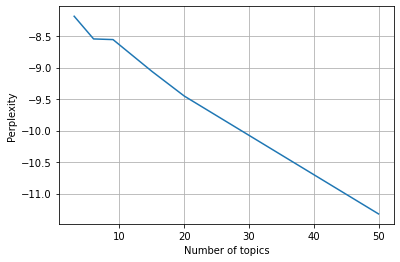

In [73]:
plt.plot([3, 6, 9, 12, 15, 20, 50], perplexity)
plt.grid()
plt.xlabel("Number of topics")
plt.ylabel("Perplexity")
plt.show()

**[2pts] Q1.5.2**  From the above graph what topic number would you choose and why? Is it a good idea to choose the topic number based on perplexity? why or why not?

Just based on the above graph one would be tempted to chose the number of topics as 50 because it has a low perplexity score. Perplexity is a good indication of the performance of the model, however it should not be the sole criteria to choose the topic number as it doesnt take into account the interpretability of the topics. Perplexity is biased to the size of the dataset as well. Alarger dataset will have lower perplexity score. Other metrics like coherence should also be taken into account.

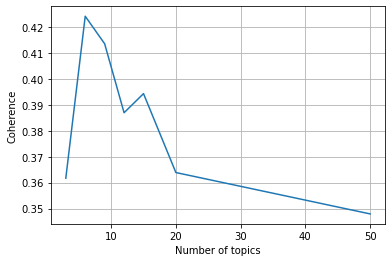

In [74]:
plt.plot([3, 6, 9, 12, 15, 20, 50], coherence_value)
plt.grid()
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.show()

**[2pts] Q1.5.3**  From the above graph what topic number would you choose and why?

Just based on the above graph we would choose 9 as the best topic number as it has high coherence value. Coherence is less biased towards the size of the dataset and is more indicative measure to the topic quality. However coherence alone should not be the criteria to choose an optimum topic number. It should always be a combination of metrics like coherence, perplexity, and overall quality of topics.

**[4pts]Q1.5.4** Compare two methods you implemented in the previous quesions, which one do you think is better and why? In answering, please discuss the actual topics generated.

Perplexity is the measure of how well the LDA model performs on unseen data while coherence is one type of interpretability measurement for a topic. We believe that coherence would be a better metric as compared to perplexity. Coherence is a measure of the interpretability and meaningfulness of the topics generated by the LDA model. We could choose the topic numbers as 15 as it has low perplexity and higher coherence value. We could also see that when topic number was 15 perplexity score was -9.05 and coherence was 0.394. This topic number covers various aspects of products reviewed such as battery, headset, bluetooth, phone cases and chargers. Topics seem to have relatively clear and distinct interpretations when the topic number is 15.

## 1.6 Alpha and Beta in LDA

**[7pts]Q1.6.1** In this problem, we will check the two most important parameters in LDA model: alpha and beta. Alpha represents document-topic density - with a higher alpha, documents are made up of more topics, and with lower alpha, documents contain fewer topics. Beta represents topic-word density - with a high beta, topics are made up of most of the words in the corpus, and with a low beta they consist of few words.

In [75]:
best_topic_num = 15 # CHANGE THIS

In [76]:
#model 1
model1 = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=best_topic_num, alpha=1/best_topic_num, eta=1/best_topic_num, random_state=42)

print("Top words:")
for topic_idx, topic in model1.show_topics(num_topics=best_topic_num, num_words=5, formatted=False):
    print('Topic %d:' % (topic_idx + 1))
    print([word for word, _ in topic])
    print()


#########################
# YOUR CODE HERE
#   - Build model for alpha = 1/num_topic = eta
#   - Print top words
#########################

Top words:
Topic 1:
['heft', 'case', 'wife', 'battery', 'use']

Topic 2:
['headset', 'use', 'ear', 'one', 'phone']

Topic 3:
['increased', 'iphone', 'thanks', 'pack', 'use']

Topic 4:
['battery', 'juice', 'pack', 'iphone', 'use']

Topic 5:
['shed', 'portability', 'depth', 'battery', 'use']

Topic 6:
['charge', 'charger', 'phone', 'usb', 'battery']

Topic 7:
['case', 'matte', 'bottom', 'purse', 'jeans']

Topic 8:
['one', 'bought', 'great', 'worked', 'headset']

Topic 9:
['phone', 'card', 'bold', 'like', 'use']

Topic 10:
['travelling', 'chore', 'iphone', 'depth', 'use']

Topic 11:
['de', 'ear', 'connectors', 'watched', 'great']

Topic 12:
['ear', 'bluetooth', 'headset', 'would', 'jawbone']

Topic 13:
['mophie', 'packs', 'indicators', 'doubles', 'led']

Topic 14:
['iphone', 'case', 'shes', 'pocket', 'gs']

Topic 15:
['pro', 'apple', 'original', 'great', 'one']



In [77]:
#model 2
#model2 = None

model2 = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=best_topic_num, alpha=1/2, eta=1/5, random_state=42)

print("Top words:")
for topic_idx, topic in model2.show_topics(num_topics=best_topic_num, num_words=5, formatted=False):
    print('Topic %d:' % (topic_idx + 1))
    print([word for word, _ in topic])
    print()

#########################
# YOUR CODE HERE
#   - Build model for alpha = 1/2, eta = 1/5
#   - Print top words
#########################

Top words:
Topic 1:
['shes', 'heft', 'trade', 'wife', 'case']

Topic 2:
['shed', 'use', 'wearing', 'chore', 'headset']

Topic 3:
['iphone', 'pack', 'use', 'need', 'increased']

Topic 4:
['battery', 'juice', 'pack', 'mophie', 'iphone']

Topic 5:
['depth', 'alternative', 'use', 'regularly', 'doubles']

Topic 6:
['phone', 'battery', 'pack', 'extra', 'charge']

Topic 7:
['case', 'iphone', 'mophie', 'bottom', 'pack']

Topic 8:
['great', 'one', 'iphone', 'iphones', 'phone']

Topic 9:
['phone', 'like', 'use', 'one', 'card']

Topic 10:
['chore', 'travelling', 'iphone', 'cable', 'use']

Topic 11:
['great', 'defectuoso', 'phone', 'case', 'one']

Topic 12:
['ear', 'bluetooth', 'jawbone', 'would', 'great']

Topic 13:
['mophie', 'phone', 'battery', 'great', 'shed']

Topic 14:
['iphone', 'gs', 'case', 'accessible', 'pocket']

Topic 15:
['great', 'one', 'use', 'phone', 'original']



In [78]:
#model 3
#model3 = None

model3 = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=best_topic_num, alpha='auto', eta='auto', random_state=42)

print("Top words:")
for topic_idx, topic in model2.show_topics(num_topics=best_topic_num, num_words=5, formatted=False):
    print('Topic %d:' % (topic_idx + 1))
    print([word for word, _ in topic])
    print()
#########################
# YOUR CODE HERE
#   - Build model for alpha = 'auto' = eta
#   - Print top words
#########################

Top words:
Topic 1:
['shes', 'heft', 'trade', 'wife', 'case']

Topic 2:
['shed', 'use', 'wearing', 'chore', 'headset']

Topic 3:
['iphone', 'pack', 'use', 'need', 'increased']

Topic 4:
['battery', 'juice', 'pack', 'mophie', 'iphone']

Topic 5:
['depth', 'alternative', 'use', 'regularly', 'doubles']

Topic 6:
['phone', 'battery', 'pack', 'extra', 'charge']

Topic 7:
['case', 'iphone', 'mophie', 'bottom', 'pack']

Topic 8:
['great', 'one', 'iphone', 'iphones', 'phone']

Topic 9:
['phone', 'like', 'use', 'one', 'card']

Topic 10:
['chore', 'travelling', 'iphone', 'cable', 'use']

Topic 11:
['great', 'defectuoso', 'phone', 'case', 'one']

Topic 12:
['ear', 'bluetooth', 'jawbone', 'would', 'great']

Topic 13:
['mophie', 'phone', 'battery', 'great', 'shed']

Topic 14:
['iphone', 'gs', 'case', 'accessible', 'pocket']

Topic 15:
['great', 'one', 'use', 'phone', 'original']



**[3pts]1.6.2**  Explain how the different alpha and beta values theoretically influence the LDA model. Then describe what you find in the empirical result (e.g difference in topic words and topics)

Alpha has a strong influence on the number of topics in the LDA model. A higher alpha corresponds to more topics to be represented in each document, which can lead to a higher number of overall topics in the model. Beta has a strong influence on the degree of word overlap between topics. A higher beta value correspinds to more diverse words to be represented in each topic, which can lead to less overlap between topics.

For model2 and model3 results are pretty similar. For model one we have a very low alpha and eta which could explain why its different from others. In model3 when we use 'auto' we basically tell the model to choose the best hyperparameters.

The topic number 15 covers various aspects of products reviewed such as battery, headset, bluetooth, phone cases and chargers. Topics seem to have relatively clear and distinct interpretations when the topic number is 15.
There is not much difference when it comes to the 3 models between the top words, only difference would be minute variation in prbabilities.

## 1.7 LDA on a short text dataset

**[10pts]1.7.1** In this part, we will read a dataset from twitter and build a LDA model. On Windows, download and unzip the dataset from [this link](http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip). Place the downloaded dataset in the same folder as this notebook. Use the first 10,000 lines in the "training.1600000.processed.noemoticon.csv" file. 

In [79]:
!wget http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip # Linux and OSX only
!unzip trainingandtestdata.zip # Linux and OSX only

--2023-02-26 23:06:21--  http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip [following]
--2023-02-26 23:06:22--  https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81363704 (78M) [application/zip]
Saving to: 'trainingandtestdata.zip'

trainingandtestdata 100%[===================>]  77.59M  24.3MB/s    in 3.5s    

2023-02-26 23:06:26 (22.1 MB/s) - 'trainingandtestdata.zip' saved [81363704/81363704]

Archive:  trainingandtestdata.zip
  inflating: testdata.manual.2009.06.14.csv  
  inflating: training.1600000.processed.noemoticon.csv  


In [93]:
!head -n 10000 training.1600000.processed.noemoticon.csv > twitter.csv # Linux and OSX only

In [94]:
def read_twitter(fname):
    """ Read the given dataset into list and clean stop words. 
    
    Args: 
        fname (string): filename of Twitter Dataset
        
    Returns:
        list of list of words: we view each document as a list, including a list of all words 
    """
    twitter = []
    punctuationRegex = r'\W+|\d+'
    with open(fname,encoding="latin-1") as f:
        for line in f:
            tweet = f.readline().split(",")[5]
            tweet = re.sub(punctuationRegex, " ", tweet)
            words = [word for word in tweet.split() if word not in stopwords.words('english')]
            
            twitter.append(words)
            ########################
            # YOUR CLEANING CODE HERE
            #    - Clean tweet
            #    - Split into list words
            #    - Store list in twitter
            ########################
    return twitter

In [95]:
%%time
twitter = read_twitter('twitter.csv')

CPU times: user 2.93 s, sys: 375 ms, total: 3.31 s
Wall time: 3.31 s


In [97]:
twitter_dictionary = gensim.corpora.Dictionary(twitter) # TODO: build dictionary
twitter_corpus =[twitter_dictionary.doc2bow(text) for text in twitter]# TODO: build corpus for model

In [98]:
print(len(twitter_dictionary))

10492


In [99]:
%%time
########################
# YOUR CODE HERE
#    - Build model
#    - Print top words
########################


twitter_lda_model= gensim.models.ldamodel.LdaModel(corpus=twitter_corpus,id2word=twitter_dictionary,num_topics=5,random_state=42)


top_words = twitter_lda_model.show_topic(0, topn=10)
print(top_words)
#pprint(twitter_lda_model.print_topics())

#for i in range(num):
#        topic = model.show_topic(i, topn=5)
#        words = [word[0] for word in topic]
#        print(f"Topic {i}: {' '.join(words)}")
#for topic_num in [3, 6, 9, 12, 15]:
#    print(f"\nTopic {topic_num}:")
#    top_words = twitter_lda_model.show_topic(topic_num, topn=5)
#    print(f"Topic {topic_num}: {' '.join(top_words)}")
    #for word, prob in top_words:
    #    print(f"\t{word} ({prob:.3f})")

[('I', 0.03303758), ('work', 0.010796433), ('today', 0.00761333), ('feeling', 0.0068769534), ('much', 0.0055566044), ('want', 0.005072841), ('need', 0.005066201), ('back', 0.004817887), ('still', 0.004655121), ('well', 0.004607212)]
CPU times: user 1.03 s, sys: 9.15 ms, total: 1.04 s
Wall time: 1.04 s


## 1.8 LDA visualization

**[10pts]1.8.1** We will now visualize the LDA output using pyLDAvis. PyLDAVis shows the following:

   1. The distances between topics, as a map in 2-D space.
   2. The variance in the topic-word distribution, as the size of a circle in this map.
   3. The most "salient" terms in each topic.

In [86]:
sentences = read_dataset("reviews_Cell_Phones_and_Accessories_5.json.gz")[:1000] # CHANGE TO YOUR DATASET

In [87]:
%%time
import pyLDAvis.gensim

CPU times: user 10.9 ms, sys: 7.98 ms, total: 18.9 ms
Wall time: 18.2 ms


In [88]:
%%time
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
data = None
dictionary = gensim.corpora.Dictionary(sentences)
corpus = [dictionary.doc2bow(sentence) for sentence in sentences]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=12)



data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, sort_topics=False)
#vis
########################
# YOUR CODE HERE
#   - Initalize pyLDAvis with your model
#   - Make sure to use a subset of the sentences in the dataset
#     if your pyLDAvis call in the cell below is taking too long
########################

/Users/akash4/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


CPU times: user 1.47 s, sys: 2.89 s, total: 4.36 s
Wall time: 2.6 s


In [89]:
pyLDAvis.enable_notebook()
pyLDAvis.display(data)

# 2.word2Vec [40pts]


In this problem, we use Amazon Review Dataset to perform Word2Vec and Doc2Vec to extract insights relevant for e-commerce business. For this question, download and use the dataset [here](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz||reviews_Electronics_5.json.gz).

## 2.1 Data Cleaning



The following code reads the data from a GZIP file.

In [100]:
# A function to read the zipped data at a specfic path
#
# How to use:
# PATH = "/path/to/file"
# for line in parse(PATH):
#   do something with line
#
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

We will now read the data and preprocess it using the following steps:

   1. Remove stopwords
   2. Lower-case all words
   3. Remove words with less than 2 characters
   4. Remove punctuation
   5. Split each sentence into a list of words

   And finally extract 10000 reviews.

In [101]:
# A function to clean a single line of text
def clean_line(line):
    """ Clean stopwords and punction for each line
    
    Args: 
        line (string): one line in file
        
    Returns:
        list(str): a list of all words in the sentence
    """
    punctuationRegex = r'\W+|\d+'
    stopWords = set(stopwords.words('english'))
    line = line.split(" ")
    filtered_content = []
    for word in line:
        word = word.lower()
        word = re.sub(punctuationRegex, '', word)
        if word not in stopWords and word != '' and len(word) > 2:
            filtered_content.append(word)
        
    return filtered_content

In [102]:
def read_dataset(fname):
    """ Read the 10000 lines in given dataset into list and clean stop words. 
        
    Args: 
        fname (string): filename of Amazon Review Dataset
        
    Returns:
        list of list of words: we view each document as a list, including a list of all words 
    """
    count = 0
    exp_dataset = []
    for review in parse(fname):
        line = review["reviewText"]
        new_line = clean_line(line)
        exp_dataset.append(new_line)
        count += 1
        if count > 10000:
            break
    return exp_dataset

In [103]:
%%time
r = read_dataset("reviews_Electronics_5.json.gz")

CPU times: user 1.94 s, sys: 118 ms, total: 2.06 s
Wall time: 2.06 s


## 2.2 Build a doc2vec model

**[3pts]2.2.1** In this question, first we will build a Word2Vec model using ginsim using size=300, min_count=40, win- dow=10, negative=10, max_vocab_size=10000. Train the model for 30 epochs.

In [104]:
from gensim.models import Word2Vec
import multiprocessing

# Read the dataset
dataset_path = "reviews_Electronics_5.json.gz"
sentences = read_dataset(dataset_path)

# Set up parameters for Word2Vec model
num_features = 300  # Size of the word vectors
min_word_count = 40  # Minimum frequency of words to be included in the vocabulary
context_size = 10  # Size of the context window
num_negative = 10  # Number of negative samples to be used in training
max_vocab_size = 10000  # Maximum size of the vocabulary
num_epochs = 30  # Number of iterations over the dataset

# Build the Word2Vec model
model = Word2Vec(sentences=sentences, vector_size=num_features, window=context_size,
                 min_count=min_word_count, negative=num_negative,
                 max_vocab_size=max_vocab_size, workers=multiprocessing.cpu_count())


# Train the model for the specified number of epochs
model.train(sentences, total_examples=model.corpus_count, epochs=num_epochs)

# Save the trained model
model.save("word2vec.model")

**[2pts]2.2.2** Use model.wv.doesnt_match to find a word in ["Canon","Nikon","junk"] that does not

belong.

In [105]:
# YOUR CODE HERE ["Canon", "Nikon", "junk"]
words = ["Canon", "Nikon", "junk"]
odd_word = model.wv.doesnt_match(words)
print(odd_word)

junk


**[3pts]2.2.3** Come up with 3 other word lists and apply the above function. Explain your observation.

In [106]:
# write your code here
words3 = ["singing", "dancing", "writing", "cooking", "swimming"]
odd_word3 = model.wv.doesnt_match(words3)
print(odd_word3)

writing


The other words are all activities that involve physical movement, while "writing" is a sedentary activity.

**[2pts]2.2.4** What are some tasks in e-commerce that can be solved with this simple function?

Search relevance: In e-commerce search engines, this function can be used to identify search terms that do not match the products being sold. For example, if a customer searches for "laptop accessories" on an e-commerce site, this function can be used to identify any search terms that do not match the products being sold, such as "furniture" or "clothing". This can help improve search relevance and accuracy.


## 2.3 Build a doc2vec model

**[15 pts] 2.3.1**  Each review is marked by other customers as “helpful” or not. The "helpful: [a, b]" item in each review is (a) the number of people who marked the review as helpful, and (b) the total number of people who have marked the review as helpful or unhelpful. The "helpfulness" score of a review can be calculated as a/b. Define a "helpful" review as one with helpfulness score >= 0.8. Given a review that is only slightly helpful, could we find textually similar reviews but have higher helpfulness? Build Doc2Vec model with gensim on review data. Use product ID “B00006I5WJ” and ReviewerID with “A14453U0KFWF31” as an example, find top 5 helpful reviews of the same product with similarity score above 0.8. 

In [107]:
import os
def read_reviewers_data(fname, min_count=0):
    '''
    Save all reviews into their own product asin files.
    Make sure you have 'product' folder when you run this answer.
    In each file, you can choose your own log structure. In this answer, log strucutre is like 
        "reviewText"\t"reviewerID"\t"helpful"
    Args: 
        fname: dataset file path
        min_count: minimum number of reviews of a product
    Returns:
        none
    '''
    if not os.path.isdir('product'):
        os.makedirs('product')
    asin_list = []
    tmp_list = []
    last_asin = ""
    j = 0
    for i in parse(fname):
        if last_asin != i['asin']:
            if len(tmp_list) > min_count:
                f = open("product/" + last_asin+".txt", 'w')
                for one in tmp_list:
                    f.write(one)
                f.close()
            tmp_list = []
            last_asin = i['asin']
        tmp_list.append(i["reviewText"] + '\t' + i["reviewerID"] +
                    '\t' + handle_helpful(i["helpful"]) + "\n")
        j += 1
        if j > 100000:
            break
            
def handle_helpful(helpful):
    '''
    Helper function for helpful_score calculate
    Args: 
        helpful: list. The first element is the number of people think this is helpful. The second element
            is the total number of people evaluate this comment
    Returns:
        String: number represent helpfulness
    '''
    if helpful[1] != 0:
        helpfulness = 1.0 * helpful[0] / helpful[1]
        return str(helpfulness)
    else:
        return str(0)

In [108]:
read_reviewers_data("reviews_Electronics_5.json.gz")

In [109]:
class TaggedReviewDocument(object):
    '''
    This class could save all products and review information in its dictionary and generate iter for TaggedDocument
        which could used for Doc2Vec model
    '''
    def __init__(self, dirname):
        self.dirname = dirname
        self.helpfulness = {}  # key:reviewerID value:helpfulness
        self.product = {}      # key:asin value:reviewerID
        self.asin = []

    def __iter__(self):
        for filename in os.listdir(self.dirname):
            asin_code = filename[:-4] #delete ".txt"
            self.product[asin_code] = []
            self.asin.append(asin_code)
            for line in enumerate(open(self.dirname + "/" + filename)):
                line_content = line[1].split("\t")
                self.product[asin_code].append(line_content[1])
                self.helpfulness[line_content[1]] = float(line_content[2])
                yield TaggedDocument(clean_line(line_content[0]), [line_content[1], line_content[2]])


In [110]:
documents = TaggedReviewDocument("product")

In [111]:
%%time
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
model = gensim.models.doc2vec.Doc2Vec(vector_size=40, min_count=2, epochs=30)
model.build_vocab(documents)

CPU times: user 17.3 s, sys: 739 ms, total: 18 s
Wall time: 18 s


In [24]:
%%time
# training model
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

CPU times: user 13min 47s, sys: 48.7 s, total: 14min 36s
Wall time: 10min 47s


In [112]:
print(model.infer_vector(['violent', 'means', 'to', 'destroy', 'the','organization']))

[ 0.00377679 -0.00988989  0.00709587  0.01139395 -0.00072623  0.0044816
 -0.0115565  -0.00490216  0.01012577 -0.00609813 -0.00576277 -0.00321292
  0.00111237 -0.00879155  0.00591692  0.00073112  0.00058264 -0.00292884
 -0.0068485  -0.00727814 -0.01194969  0.01120882  0.00700679  0.01214727
 -0.00680505  0.00554709 -0.00825797  0.01036192  0.00476772  0.00325028
  0.00545589 -0.00509526 -0.01086845  0.00681125  0.01040555  0.0028075
  0.00070312  0.00197323  0.00030203  0.00999978]


In [115]:
product_id = 'B00006I5WJ'
reviewer_id = 'A14453U0KFWF31'

In [116]:
import numpy as np

# Get the vectors for the target review
target_review = documents.product[product_id][documents.product[product_id].index(reviewer_id)]
target_vec = model.infer_vector(clean_line(target_review))

# Find similar reviews with a helpfulness score >= 0.8
similar_reviews = []
for review in documents.product[product_id]:
    review_vec = model.infer_vector(clean_line(review))
    similarity = np.dot(target_vec, review_vec)
    helpfulness = documents.helpfulness[review]
    if helpfulness >= 0.8 and review != target_review:
        similar_reviews.append((review, similarity, helpfulness))

# Sort the similar reviews by similarity score in descending order
similar_reviews.sort(key=lambda x: x[1], reverse=True)

# Print the top 5 similar reviews
print(f"Top 5 similar reviews for product {product_id} and reviewer {reviewer_id}:")
for i in range(5):
    print(f"Review text: {similar_reviews[i][0]}")
    print(f"Similarity score: {similar_reviews[i][1]}")
    print(f"Helpfulness score: {similar_reviews[i][2]}")
    print("\n")

Top 5 similar reviews for product B00006I5WJ and reviewer A14453U0KFWF31:
Review text: A2IXUSSQ4KJEAX
Similarity score: 0.0009008933557197452
Helpfulness score: 1.0


Review text: A2VOVOB2HOI19Y
Similarity score: 0.000555880949832499
Helpfulness score: 1.0


Review text: A2HUJ5591OJ5GP
Similarity score: 0.0005534884403459728
Helpfulness score: 1.0


Review text: A1MSY5U64K1Y3D
Similarity score: 0.0005196036072447896
Helpfulness score: 1.0


Review text: AV2RJE8ON6SMS
Similarity score: 0.00048726939712651074
Helpfulness score: 1.0




## Find similar reviews

In [117]:
def find_similar_reviews(asin,reviewer_id):
    '''
    If one review is similar to the specefic review and it is much helpful, save it to a list
    Args: 
        asin: product asin
        reviewer_id: the specific review
    Returns:
        list of reviewer id
    '''
    result = []
# Get the vectors for the target review
    target_review = documents.product.get(asin, [])[documents.product.get(asin, []).index(reviewer_id)]
    target_vec = model.infer_vector(clean_line(target_review))

    # Find similar reviews with a helpfulness score >= 0.8
    for review in documents.product.get(asin, []):
        if review != target_review:
            review_vec = model.infer_vector(clean_line(review))
            similarity = np.dot(target_vec, review_vec)
            helpfulness = documents.helpfulness[review]
            if helpfulness >= 0.8 and review != target_review:
                result.append(documents.product[asin][documents.product[asin].index(review)])
    return result

In [118]:
print(find_similar_reviews("B00006I5WJ", "A14453U0KFWF31")) 

['A2IXUSSQ4KJEAX', 'A5R2B0FQ4DXYE', 'A2METVF6WV7OZT', 'A36BDWLPMQQR66', 'A34I0THENPIH02', 'A1FX4T79YE9CKA', 'AK73Y669AMPVS', 'A2VOVOB2HOI19Y', 'A1ZJSYEQQDIDAA', 'A1D0KL9ZD7SU56', 'AV2RJE8ON6SMS', 'A1XX32LG8E078Y', 'A186O61T87WGYG', 'A2HUJ5591OJ5GP', 'AGITH5SMFTBOB', 'A31C6U0IWYJE7R', 'A5C7KD02LS69I', 'AOUKRECWP828A', 'A32TSY95CFGCL2', 'A3EB98NUJ4ASUB', 'A1R3VSOOBW5H7T', 'A1MSY5U64K1Y3D', 'A12EXVA5RIZY6L', 'A19BA3QWTJ1ICZ', 'A2JOEQNS9LR0NF', 'A3GTQ229J3PFN8', 'A78AJA7ZP13OI', 'A3I4TQNEO4G6LT', 'A1GWQIOSUI37T4', 'A2S8ED4LF0R78W', 'A2BHFIUH37S38J', 'A1STXUS7VN9MVC', 'A3EO01MD60DOMO', 'A1AVL8TRVC5PZ4', 'A11T7CEFCSAM9W', 'A9FUQA04WK9N2', 'A2NSR2R4M8CWC2', 'A8RMRH930ZACE', 'A6FIAB28IS79', 'A2A0HREDAG2QIC', 'ALDA72MNSJVOK', 'A2QQZ3U2MLBF6C', 'AO6URI25USNBS', 'AJZ0V9Q3ZVYWV']


## 2.4 Build a doc2vec model using product descriptions


**[10pts]2.4.1** Use product descriptions (located in meta data  [here](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Electronics.json.gz)) to build a Doc2Vec model. When building the doc2vec model, use vector_size=100, window=15, min_count=5, max_vocab_size=1000, and train it for 1 epoch.

In [119]:
def read_product_description(fname):
    '''
    Load all product descriptions
    Args: 
        fname: dataset file path
    Returns:
        dict: key is asin, value is description content
    '''
    result = {}
    for i in parse(fname):
        try:
            if "Camera & Photo" in i["categories"][0]:
                result[i["asin"]]=i["description"]
        except:
            continue
    return result

In [120]:
class TaggedDescriptionDocument(object):
    '''
    This class could save all products and review information in its dictionary and generate iter for TaggedDocument
        which could used for Doc2Vec model
    '''
    def __init__(self, descriptondict):
        self.descriptondict = descriptondict
        

    def __iter__(self):
        for asin in self.descriptondict:
            for content in self.descriptondict[asin]:
                yield TaggedDocument(clean_line(content), [asin])


In [121]:
description_dict = read_product_description("meta_Electronics.json.gz")
des_documents = TaggedDescriptionDocument(description_dict)

In [122]:
# Build a doc2vec model
# YOUR CODE HERE
# Import required libraries
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Define function to clean text
def clean_text(text):
    cleaned_text = text.lower().replace('\n', ' ').replace('\r', '')
    return cleaned_text

# Define function to create tagged documents from description dictionary
def create_tagged_documents(description_dict):
    tagged_documents = []
    for asin in description_dict:
        tagged_documents.append(TaggedDocument(words=clean_text(description_dict[asin]).split(), tags=[asin]))
    return tagged_documents

# Load product descriptions
description_dict = read_product_description("meta_Electronics.json.gz")

# Create tagged documents from description dictionary
tagged_documents = create_tagged_documents(description_dict)

# Train Doc2Vec model
model = Doc2Vec(vector_size=100, window=15, min_count=5, max_vocab_size=1000, epochs=1)
model.build_vocab(tagged_documents)
model.train(tagged_documents, total_examples=model.corpus_count, epochs=model.epochs)

**[5pts]2.4.2** Find the most similar product for Canon EOS 5D (asin:B0007Y791C) not made by Canon.

In [124]:
#Write your code here
import json
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Load product descriptions
description_dict = read_product_description("meta_Electronics.json.gz")

# Create tagged documents from description dictionary
tagged_documents = create_tagged_documents(description_dict)

# Train Doc2Vec model
model = Doc2Vec(vector_size=100, window=15, min_count=5, max_vocab_size=1000, epochs=1)
model.build_vocab(tagged_documents)
model.train(tagged_documents, total_examples=model.corpus_count, epochs=model.epochs)

# Get product name and description for Canon EOS 5D
product_name = ""
product_description = ""
for asin in description_dict:
    if asin == 'B0007Y791C':
        product_name = description_dict[asin]
        product_description = clean_text(product_name)
        break

# Get vector representation of Canon EOS 5D
vector = model.infer_vector(product_description.split())

# Find cosine similarities with other products
similar_products = model.docvecs.most_similar([vector], topn=len(model.docvecs))

# Filter out Canon products and get the most similar non-Canon product
most_similar_product = None
for product in similar_products:
    asin = product[0]
    for p in description_dict:
        if p == asin and 'Canon' not in description_dict[p]:
            most_similar_product = asin
            break
    if most_similar_product is not None:
        break

print(f"The most similar product to {product_name} not made by Canon is {most_similar_product}")



The most similar product to World's smallest and lightest full-frame digital SLR as of August 2005 the sensor operates without a conversion factor.New larger 2.5-inch LCD screen can be viewed even at extreme angles of up to 170 degrees.New larger 2.5-inch LCD screen can be viewed even at extreme angles of up to 170 degrees.Consecutive shooting allows the capture of 3.0 frames per second for up to 60 consecutive JPEG or 17 RAW frames in a burst. not made by Canon is B004H8FNF8


/var/folders/h1/w1j0fs7j02zcp2s9qrs4jxb80000gn/T/ipykernel_69392/1680722553.py:29: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  similar_products = model.docvecs.most_similar([vector], topn=len(model.docvecs))
/var/folders/h1/w1j0fs7j02zcp2s9qrs4jxb80000gn/T/ipykernel_69392/1680722553.py:29: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  similar_products = model.docvecs.most_similar([vector], topn=len(model.docvecs))
